In [15]:
example_sentence = """
Colors affect the culture of a nation and they vary with time and place. Taking an example, the Americans consider the yellow red and green color chain to be good whereas in Japan, greens and blue are considered good and red and purple are bad. Green is the dominant color in Mongolia. It might be a sign of their appreciation towards the nature and fauna.
"""

Next up we need to import the dependancies of packages we wish to use (`matplotlib`). To make our lives even easier, there's a list of named colours inbuilt into `matplotlib`! To see them all, head to <https://matplotlib.org/3.1.0/gallery/color/named_colors.html>. We're going to make use of the CSS colours in this directory.

In [16]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

Next we create a function that's going to analyse all the words in the text, determine if the named colour exists (even in the substring), and create a new list of same length as the number of words that we will use to colour them later on. We split the text by spaces to create a list where each element in the list is a string of the single word, and initilise two lists that we will fill. We iterate over each word, and check if the named colour exists in the substring, if it does then we append that colour into the colour list, if not then we give it a fall back colour (defaults to black for a white canvas). Finally the function returns both the lists in a tuple which we can extract from the function return.

In [17]:
def find_color_word(text,color_dictionary,base_color='black'):
    split_text = text.split(' ')
    color_list = []
    word_list = []
    for word in split_text:
        for color in color_dictionary.keys():
            if color in word:
                color_list.append(color)
        word_list.append(word.strip('\n'))
        if len(word_list) != len(color_list):
            color_list.append(base_color)
    return word_list,color_list

words, colors = find_color_word(example_sentence,mcolors.CSS4_COLORS,'white')

print(words[20:25])
print(colors[20:25])

['the', 'yellow', 'red', 'and', 'green']
['white', 'yellow', 'red', 'white', 'green']


Next we need to take these two lists to construct our typography art. We create a function that initialises a canvas, iterates over our two lists (with zip), and word by word places them on the canvas with the colour specified, finally returning the canvas that could be used in a figure.

In [18]:
def plot_colored_text(ax,words,colors, space=0.01, w=0.2, w_limit=0.75, y=1, y_diff=0.1):
    r = f.canvas.get_renderer()
    original_w = w
    for word, color in zip(words,colors):
        t = ax.text(w, y, word,color=color,fontsize=12,ha='left')
        transf = ax.transData.inverted()
        bb = t.get_window_extent(renderer=f.canvas.renderer)
        bb = bb.transformed(transf)
        w = w + bb.xmax-bb.xmin + space
        if w > w_limit:
            w = original_w
            y = y - y_diff
    return ax

Now we've got a canvas, it's time to plot!

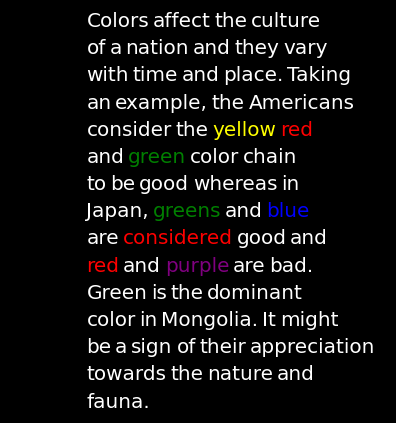

In [19]:
f = plt.figure(figsize=(4,3), dpi=120)
f.set_facecolor('black')
ax = f.add_subplot(111)
ax.axis('off')

plot_colored_text(ax,words,colors)

plt.show()